## Método de diferencias finitas para problemas con condiciones de frontera

In [11]:
import numpy as np
import sympy
import math
import matplotlib.pyplot as plt
from mpmath import *
sympy.init_printing()

Resolvemos un ejemplo con el método de diferencias finitas. Este método incluye ya la solución de la matriz tridiagonal por el método de factorización LU.
Consideramos la siguiente ecuación diferencial:
$$
-\frac{2}{x}y''(x)+\frac{2}{x^2}y'(x)+\frac{sin(ln(x))}{x^2}y(x)=0
$$
Con condiciones de frontera $y(0)=1$ y $y(4)=2$

In [8]:
#Defimimos las funciones 
def p(val):
    return(-2/val)
def q(val1):
    return(2/(val1**2))
def r(val2):
    return((math.sin(math.log(val2)))/(val2**2))

In [1]:
#Método de diferencias Finitas
def diferencias(a,b,al,be,N):
    listax=[]
    listay=[]
    A=np.zeros(N)
    B=np.zeros(N-1)
    c=np.zeros(N)
    d=np.zeros(N)
    l=np.zeros(N)
    u=np.zeros(N)
    z=np.zeros(N)
    w=np.zeros(N+2)
    #Paso1
    h=(b-a)/(N+1)
    x=a+h
    A[0]=2+(h**2)*q(x)
    B[0]=-1+(h/2)*p(x)
    d[0]=-(h**2)*r(x)+(1+(h/2)*p(x))*al
    #Paso2
    for i in range(1,N-1):
        x=a+i*h
        A[i]=2+(math.pow(h,2))*q(x)
        B[i]=-1+(h/2)*p(x)
        c[i]=-1-(h/2)*p(x)
        d[i]=-(math.pow(h,2))*r(x)
    #Paso3
    x=b-h
    A[N-1]=2+(math.pow(h,2))*q(x)
    c[N-1]=-1-(h/2)*p(x)
    d[N-1]=-(math.pow(h,2))*r(x)+(1-(h/2)*p(x))*be
    #Paso4
    l[0]=A[0]
    u[0]=B[0]/A[0]
    z[0]=d[0]/l[0]
    #Paso5
    for j in range(1,N-1):
        l[j]=A[j]-c[j]*u[j-1]
        u[j]=(B[j]/l[j])
        z[j]=(d[j]-c[j]*z[j-1])/l[j]
    #Paso6
    l[N-1]=A[N-1]-c[N-1]*u[N-2]
    z[N-1]=(d[N-1]-c[N-1]*z[N-2])/l[N-1]
    #Paso7
    w[0]=al
    w[N+1]=be
    w[N]=z[N-1]
    #Paso8
    lista=list(np.arange(1,N))
    lista.reverse()
    for k in lista:
        w[k]=z[k-1]-u[k-1]*w[k+1]
    for m in range(N+2):
        x=a+m*h
        listax.append(x)
        listay.append(w[m])
        print(x,w[m])
    return(listax,listay)

In [2]:
#Ejemplo resuelto
x,y=diferencias(1,5,1,2,20)

NameError: name 'np' is not defined

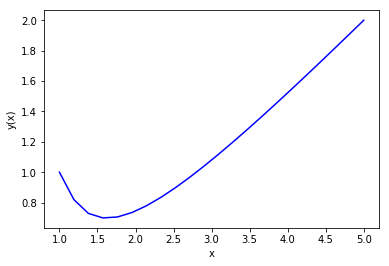

In [32]:
fig, ax=plt.subplots()
ax.plot(x,y,color="blue")
ax.set_xlabel("x")
ax.set_ylabel("y(x)")
ax.legend()
plt.show()